# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

#### 1.1. Откройте файлы и изучите их.

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import t

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.utils import shuffle
from sklearn.impute import KNNImputer
import statistics as stat

import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore") 
import seaborn as sns 
pd.set_option('display.max_columns', None)
import scipy.stats as stats
import pylab

In [2]:
#загрузим датасеты
full = pd.read_csv('/datasets/gold_recovery_full.csv')
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')

In [3]:
#выведем на экран полный датасет
full

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

22716 строк и 87 колонок

In [4]:
#изучим подробнее столбцы датафрейма
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

#### 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [5]:
#рассчитаем и проверим правильность Recovery после флотации. Используем функцию.
def recovery(F,C,T):
     try:
        recovery = (C*(F-T))/(F*(C-T))*100
        return recovery
     except:
        return np.nan

train['rougher_test.output.recovery'] = recovery(train['rougher.input.feed_au'], 
               train['rougher.output.concentrate_au'], 
               train['rougher.output.tail_au'])

df_mae = train[['rougher.output.recovery','rougher_test.output.recovery']]
#удалим inf 
df_mae = df_mae[df_mae.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)] 

train = train.drop(['rougher_test.output.recovery'], axis = 1)
#рассчитаем mae
rougher_mae = mean_absolute_error(df_mae['rougher.output.recovery'], df_mae['rougher_test.output.recovery'])
print('mae:',rougher_mae)
df_mae.describe()

mae: 9.444891926100695e-15


,rougher.output.recovery,rougher_test.output.recovery
count,14287.000000,14287.000000
mean,82.394201,82.394201
std,15.096808,15.096808
min,0.000000,-0.000000
25%,79.818372,79.818372
50%,85.235997,85.235997
75%,90.131691,90.131691
max,100.000000,100.000000


Исходя из полученного значения mae в 9.444891926100695e-15 можно сделать вывод, что ошибка при изначальном расчёте recovery была, но незначительна.

#### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [6]:
# сравним, какие столбцы отсутсвуют в тестовом датафрейме
missed_columns_test = list(set(train.columns)-set(test.columns))
missed_columns_test

['rougher.output.concentrate_pb',
 'final.output.concentrate_sol',
 'rougher.output.tail_au',
 'final.output.concentrate_ag',
 'rougher.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_sol',
 'final.output.concentrate_pb',
 'final.output.tail_sol',
 'rougher.output.concentrate_ag',
 'rougher.output.recovery',
 'final.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.concentrate_sol',
 'final.output.recovery',
 'primary_cleaner.output.concentrate_ag',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'primary_cleaner.output.concentrate_pb',
 'final.output.tail_pb',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.output.tail_pb',
 'final.output.concentrate_au',
 'primary_cleaner.output.concentrate_au',
 'se

В тестовой выборке отсутсвуют параметры получаемого продукта после всех этапов, это выходные (output) и некоторые расчетные (calculation) характеристики процесса. Эти параметры недоступны, так как их нельзя получить/измерить во время выполнения технологического процесса.

#### 1.4. Проведите предобработку данных.

In [7]:
#преобразуем столбец с датами в datetime
test['date'] = pd.to_datetime(test['date'], format = '%Y-%m-%d %H:%M:%S')
train['date'] = pd.to_datetime(train['date'], format = '%Y-%m-%d %H:%M:%S')
full['date'] = pd.to_datetime(full['date'], format = '%Y-%m-%d %H:%M:%S')

Оставил данные за 2018 год

In [8]:
#заполним пропуски с помощью KNNImputer, т.к. соседние временные значения схожи между собой
imputer = KNNImputer(n_neighbors=4)

full.loc[:, 'final.output.concentrate_ag': 'secondary_cleaner.state.floatbank6_a_level'] = (
    imputer.fit_transform
    (full.loc[:, 'final.output.concentrate_ag': 'secondary_cleaner.state.floatbank6_a_level']))

train.loc[:, 'final.output.concentrate_ag': 'secondary_cleaner.state.floatbank6_a_level'] = (
    imputer.fit_transform
    (train.loc[:, 'final.output.concentrate_ag': 'secondary_cleaner.state.floatbank6_a_level']))

test.loc[:, 'primary_cleaner.input.sulfate': 'secondary_cleaner.state.floatbank6_a_level'] = (
    imputer.fit_transform
    (test.loc[:, 'primary_cleaner.input.sulfate': 'secondary_cleaner.state.floatbank6_a_level']))

# 2. Анализ данных

#### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [9]:
#используем boxplot, выведем графики с помощью функции
def metal_concentrate(metall_concentrate, feed_ , title):
    con_list = (list(train[[x for x in train.columns if metall_concentrate in x]]))
    con_list.append(feed_)
    con_list = reversed(con_list)
    plt.figure(figsize=(14,5))
    ax = sns.boxplot(data=train[con_list])
    ax.set_title(title)

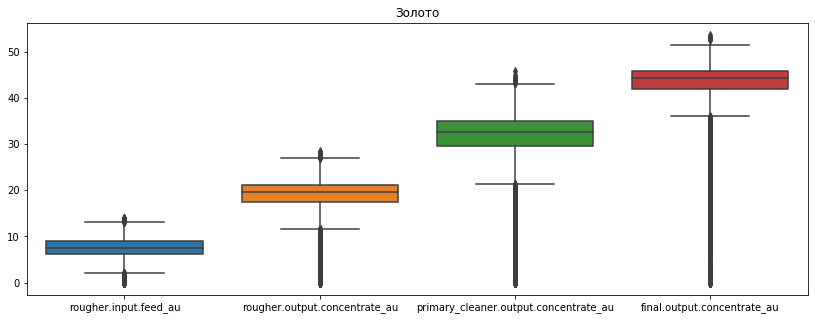

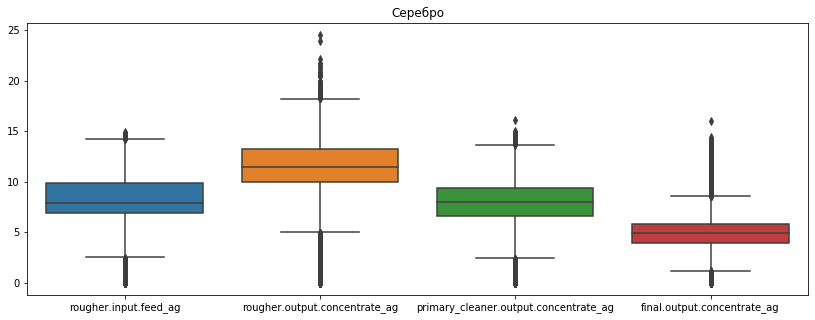

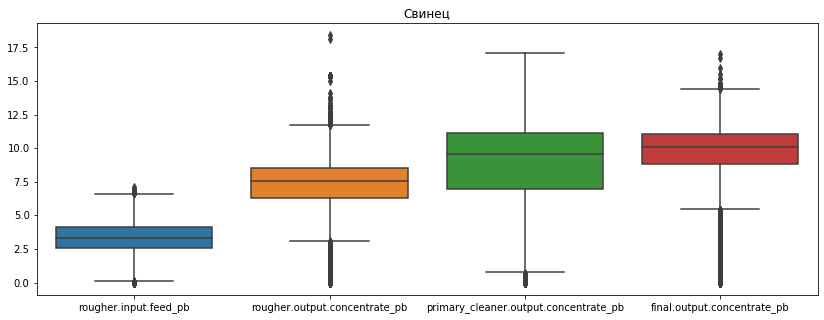

In [10]:
metal_concentrate('concentrate_au','rougher.input.feed_au' , 'Золото')
metal_concentrate('concentrate_ag','rougher.input.feed_ag', 'Серебро')
metal_concentrate('concentrate_pb','rougher.input.feed_pb', 'Свинец')

Исходя из полученных данных, можно сделать вывод, что концентрация золота значительно увеличивается после каждого из этапов производственного процесса.
Концентрация серебра, напротив, снижалась на каждом из этапов.
Концентрация свинца, незначительно увеличилась после флотации, на этапе очистки среднее осталось практически прежним, но уменьшился разброс в значениях. 

#### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [11]:
#создадим функцию для нормализованных гистограмм
def normolized_hist(data1,data2, label1, label2):
    plt.figure(figsize=(10,5), dpi= 80)
    sns.distplot(data1, rug=True, norm_hist = True, label=label1)
    sns.distplot(data2, rug=True, norm_hist = True, label = label2)
    plt.legend()

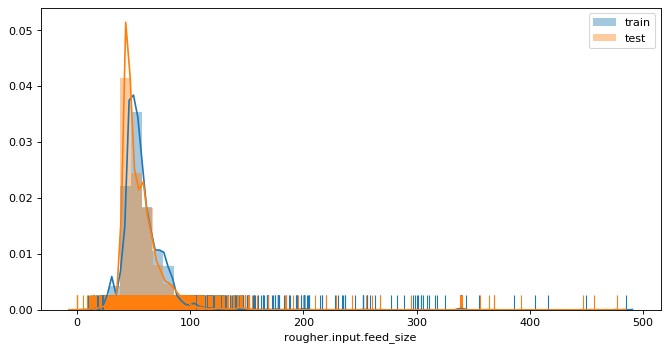

In [12]:
#посмотрим на распределенииe и его плотность на флотации
normolized_hist(train['rougher.input.feed_size'], test['rougher.input.feed_size'], "train", "test")

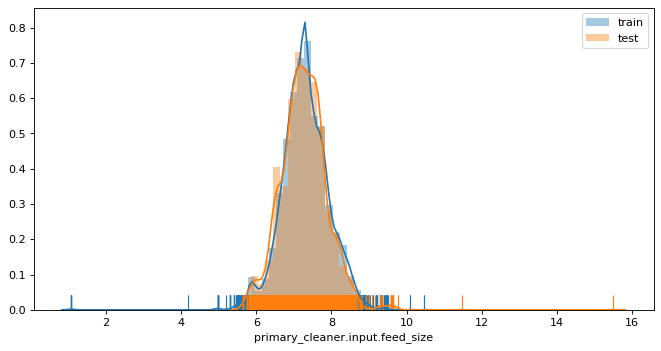

In [13]:
#и после очистки
normolized_hist(train['primary_cleaner.input.feed_size'], test['primary_cleaner.input.feed_size'], "train", "test")

В обоих случаях, размеры гранул распределены схоже.Удалим выбросы.

In [14]:
train = train[(train['rougher.input.feed_size'] > 20) & (train['rougher.input.feed_size'] < 110)]
test = test[(test['rougher.input.feed_size'] > 20) & (test['rougher.input.feed_size'] < 110)]

train = train[(train['primary_cleaner.input.feed_size'] > 5) & (train['primary_cleaner.input.feed_size'] < 9)]
test = test[(test['primary_cleaner.input.feed_size'] > 5) & (test['primary_cleaner.input.feed_size'] < 9)]

#### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

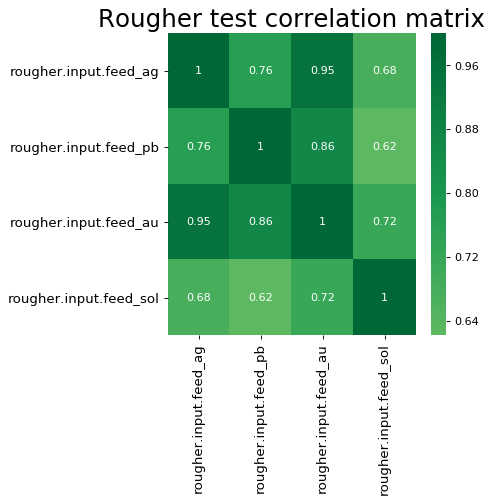

In [15]:
#посмотрим на корреляцию между веществами на начальном этапе
col_list = ['rougher.input.feed_ag',
'rougher.input.feed_pb',
'rougher.input.feed_au',
'rougher.input.feed_sol']

plt.figure(figsize=(5,5), dpi= 80)
sns.heatmap(test[col_list].corr(), xticklabels=test[col_list].corr().columns, 
            yticklabels=test[col_list].corr().columns, 
            cmap='RdYlGn', center=0, annot=True)

plt.title('Rougher test correlation matrix', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Все значения достаточно сильно коррелируют между собой, посмотрим на суммарную концентрацию на разных стадия. 

In [16]:
#создадим датафрейм с суммарными концентрациями веществ на разных этапах для тренировочнйо выборки
train_sum, test_sum  = pd.DataFrame(), pd.DataFrame()

#исходное сырьё
train_sum['rougher.concentrate.sum'] = (train['rougher.input.feed_ag'] 
                                  + train['rougher.input.feed_pb'] 
                                  + train['rougher.input.feed_au']
                                  + train['rougher.input.feed_sol'])

#после флотации
train_sum['rougher_output.concentrate.sum'] = (train['rougher.output.concentrate_ag'] 
                                  + train['rougher.output.concentrate_pb'] 
                                  + train['rougher.output.concentrate_au']
                                     + train['rougher.output.concentrate_sol'])


#черновой концентрат
train_sum['primary.concentrate.sum'] = (train['primary_cleaner.output.concentrate_ag'] 
                                  + train['primary_cleaner.output.concentrate_pb'] 
                                  + train['primary_cleaner.output.concentrate_au']
                                  + train['primary_cleaner.output.concentrate_sol'])
#финальный концентрат
train_sum['final.concentrate.sum'] = (train['final.output.concentrate_ag'] 
                                  + train['final.output.concentrate_pb'] 
                                  + train['final.output.concentrate_au']
                                     + train['final.output.concentrate_sol'])

#исходное на тестовой

test_sum['rougher.concentrate.sum'] = (test['rougher.input.feed_ag'] 
                                  + test['rougher.input.feed_pb'] 
                                  + test['rougher.input.feed_au']
                                  + test['rougher.input.feed_sol'] )

Исходное сырьё в тренировочной выборке


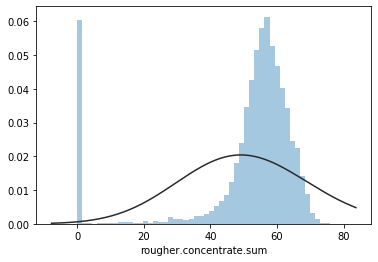

Исходное сырьё в тестовой выборке


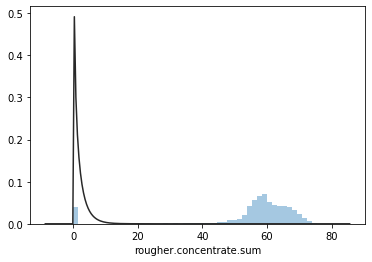

In [17]:
#посмотрим на распределение данных c помощью probability plot
#концентрации исходного сырья можем сравнить как в тестовой так и в тренировочной выборках
print('Исходное сырьё в тренировочной выборке')
sns.distplot(train_sum['rougher.concentrate.sum'], kde=False, fit=stats.gamma)
plt.show()
print('Исходное сырьё в тестовой выборке')
sns.distplot(test_sum['rougher.concentrate.sum'], kde=False, fit=stats.gamma)
plt.show()



Сырьё после очистки


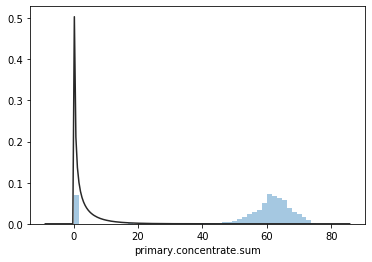

Финальный концентрат


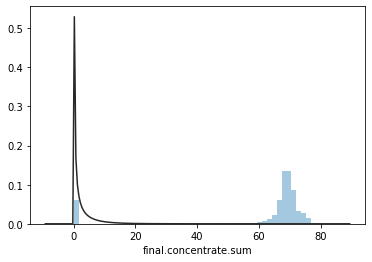

In [18]:
print('Сырьё после очистки')
sns.distplot(train_sum['primary.concentrate.sum'], kde=False, fit=stats.gamma)
plt.show()
print('Финальный концентрат')
sns.distplot(train_sum['final.concentrate.sum'], kde=False, fit=stats.gamma)
plt.show()


Из полученных графиков распределения видно, что концентрация сырья на всех этапах далека от нормального. При этом если на первом этапе распределение больше приближено к нормальному, то после финальной очистки, данные максимально отклонены от нормального. Доля металлов в сырье увеличивается после каждого этапа. Но при этом в данных есть 0 и близкие к нему значения. Срежем значения близкие к нулевым, на этапе начального сырья. (Остальные не трогаем т.к. их будем удалять из тренировочной выборки)

Исходное сырьё в тренировочной выборке


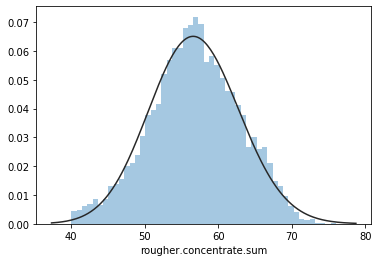

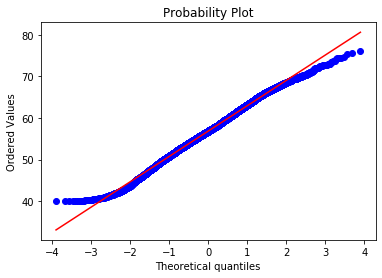

Исходное сырьё в тестовой выборке


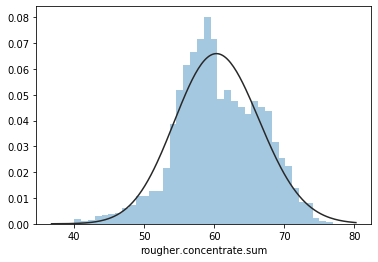

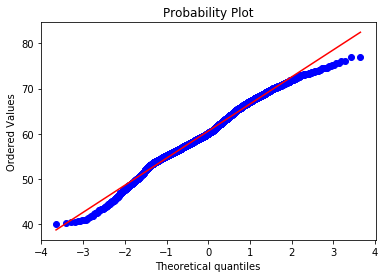

In [19]:
#попробуем отрезать хвосты
train_sum = train_sum[train_sum['rougher.concentrate.sum'] > 40]
test_sum = test_sum[test_sum['rougher.concentrate.sum'] > 40]    

#построим распределения ещё раз
print('Исходное сырьё в тренировочной выборке')
sns.distplot(train_sum['rougher.concentrate.sum'], kde=False, fit=stats.gamma)
plt.show()
stats.probplot(train_sum['rougher.concentrate.sum'], dist="norm", plot=pylab)
pylab.show()

print('Исходное сырьё в тестовой выборке')
sns.distplot(test_sum['rougher.concentrate.sum'], kde=False, fit=stats.gamma)
plt.show()
stats.probplot(test_sum['rougher.concentrate.sum'], dist="norm", plot=pylab)
pylab.show()


Убрав значения близкие к нулю, удалось приблизить данные к нормальному распределению. Так же из полученных графиков видно, что суммарная доля металлов в сырье возрастает после каждого производственного этапа. 

Удалим аномальные значения из концентрации веществ по отдельности.

In [20]:
for i in col_list:
    test = test[(test[i] < np.percentile(test[i],98)) & (test[i] > 1)]
    train = train[(train[i] < np.percentile(train[i],98)) & (train[i] > 1)]


In [21]:
#сбросим индексы
test, train = test.reset_index(drop = True), train.reset_index(drop = True)

# 3. Модель

#### 3.1. Напишите функцию для вычисления итоговой sMAPE.

In [22]:
#создадим функцию для расчёта итогового sMAPE
def smape(pr_r, ta_r, pr_f, ta_f):
    smape_rougher = 0
    smape_final = 0
    for i in range(len(ta_r)):
        smape_rougher += ((abs(ta_r[i] - pr_r[i])) / ((abs(ta_r[i]) + abs(pr_r[i])) / 2))*100
    smape_rougher = smape_rougher*(1/len(ta_r))
    
    for j in range(len(ta_f)):
        smape_final += ((abs(ta_f[i] - pr_f[i])) / ((abs(ta_f[i]) + abs(pr_f[i])) / 2))*100
    smape_final = smape_final*(1/len(ta_f))
    
    return (smape_rougher * 0.25) + (smape_final * 0.75)

#### 3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [23]:
#разделим выборки на features и target:
target_rougher_train = np.array(train['rougher.output.recovery'])
target_final_train = np.array(train['final.output.recovery'])

#Удалим столбцы отсутсвующие в тестовой выборке из тренировочной
features_train = train[list(x for x in list(train.columns) if x in list(test.columns))]
features_train = features_train.drop(columns='date')

In [24]:
#добавим таргеты в тестовую выборку
date_list = list(test['date'])
full_list = full.query('date in @date_list').reset_index(drop = True)
target_rougher_test, target_final_test = full_list['final.output.recovery'], full_list['rougher.output.recovery']
test = test.drop(columns = 'date')

features_test = test

Обучим модели на тренировочной выборке и оценим с помощью кроссвалидации

In [25]:
#Линейная регрессия
model = LinearRegression(normalize = True)

predicted_rougher = cross_val_predict(model, features_train,  target_rougher_train)
predicted_final = cross_val_predict(model, features_train,  target_final_train)

print(smape(predicted_rougher, target_rougher_train, predicted_final, target_final_train))

18.093011579644397


In [35]:
#Descision Tree
for i in range(2,5):
    model = DecisionTreeRegressor(max_depth=i)
    predicted_rougher = cross_val_predict(model, features_train,  target_rougher_train)
    predicted_final = cross_val_predict(model, features_train,  target_final_train)
    print('depth:', i , 'smape' ,
          smape(predicted_rougher, target_rougher_train, predicted_final, target_final_train))

depth: 2 smape 9.53578314143684
depth: 3 smape 7.727037323348103
depth: 4 smape 8.070528348234497


In [27]:
#Random Forest
for i in range(5, 20, 5):
    for j in range(3, 9, 2):
        model = RandomForestRegressor(n_estimators=i, max_depth=j)
        predicted_rougher = cross_val_predict(model, features_train,  target_rougher_train)
        predicted_final = cross_val_predict(model, features_train,  target_final_train)
        smape_rf = smape(predicted_rougher, target_rougher_train, predicted_final, target_final_train)
        print('estimators', i, 'depth', j, 'smape', smape_rf)

estimators 5 depth 3 smape 8.753857904128749
estimators 5 depth 5 smape 12.447858051665923
estimators 5 depth 7 smape 5.529142170914232
estimators 10 depth 3 smape 10.56038384721586
estimators 10 depth 5 smape 7.480986708577652
estimators 10 depth 7 smape 9.429155116662644
estimators 15 depth 3 smape 8.353485583596353
estimators 15 depth 5 smape 6.083274882358636
estimators 15 depth 7 smape 11.889456967435331


In [36]:
#Random Forest
model_r = RandomForestRegressor(n_estimators=5, max_depth=7)
model_f = RandomForestRegressor(n_estimators=5, max_depth=7)

model_r.fit(features_train,  target_rougher_train)
model_f.fit(features_train,  target_final_train)

predict_r = model_r.predict(features_test)
predict_f = model_f.predict(features_test)

rf_smape = smape(predict_r, target_rougher_test, predict_f, target_final_test)
print('Итоговый smape на тесте:', rf_smape)

Итоговый smape на тесте: 20.407510697330892


После обучения и проверки модели на тестовой выборке, удалось получить smape 20.407510697330892